In [95]:
# importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

quick lookout and handling missing values

In [96]:
data = pd.read_csv("datanep.csv")
print(data['Volume'].dtype)
print(data.head())
data = data.dropna()

data['Volume'] = data['Volume'].replace({',': ''}, regex=True).astype(float)
data['Volume'] = data['Volume'].astype(float)

object
         Date    Close Percent Change          Volume
0   12/5/2019  1131.92          0.00%  358,839,860.00
1   12/8/2019  1135.37          0.00%  287,527,825.00
2   12/9/2019  1148.89          0.00%  464,220,392.00
3  12/10/2019  1151.36          0.00%  500,328,915.00
4  12/11/2019  1161.47          0.00%  551,377,852.00


# visualizing data in graph


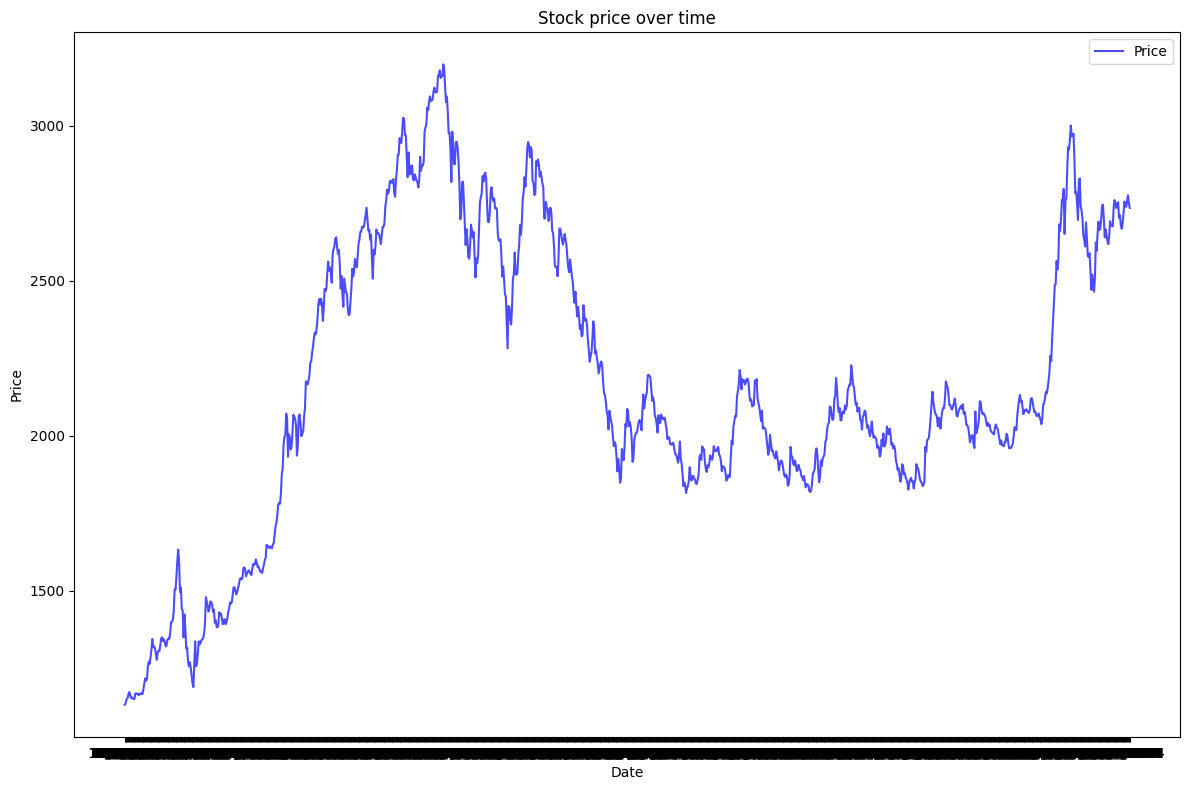

In [97]:

data_slice =data
plt.figure(figsize=(12, 8)) 
plt.plot(data_slice['Date'], data_slice['Close'], label='Price', color='b', linewidth=1.5,alpha=0.7) 

plt.title("Stock price over time")
plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.tight_layout()
plt.show()

Calculation for RSI, 
 delta is the change in price relative to previous close and close is the current price closed.
 

In [98]:

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

data['delta']= data['Close'].diff()
print(data[1110:])





            Date    Close Percent Change        Volume        RSI  delta
1110  11/10/2024  2738.06          2.33%  9.771124e+09  55.078290  62.55
1111  11/11/2024  2760.21          0.80%  1.131521e+10  52.427103  22.15
1112  11/12/2024  2748.96         -0.40%  7.859741e+09  50.492099 -11.25
1113  11/13/2024  2734.83         -0.51%  7.911976e+09  55.552548 -14.13
1114  11/14/2024  2748.78          0.51%  1.032033e+10  68.871784  13.95
1115  11/17/2024  2753.76          0.18%  1.172676e+10  66.438638   4.98
1116  11/19/2024  2702.65         -1.85%  1.046832e+10  59.600939 -51.11
1117  11/20/2024  2711.75          0.33%  7.092880e+09  64.635876   9.10
1118  11/21/2024  2680.44         -1.15%  8.257644e+09  60.041135 -31.31
1119  11/24/2024  2667.40         -0.48%  7.728861e+09  53.712938 -13.04
1120  11/25/2024  2683.24          0.59%  6.345810e+09  48.343674  15.84
1121  11/26/2024  2716.66          1.24%  7.449899e+09  56.850565  33.42
1122  11/27/2024  2755.47          1.42%  9.312935e

assigning label and scaling the features

In [99]:


# select only the numeric columns
features = [ 'RSI','Close', 'Volume']
data['Next Close'] = data['Close'].shift(-1) # tomorrow price is the label for today data so shifting the label accordingly
data.tail


# Convert columns to numeric, handling errors
data[features] = data[features].apply(pd.to_numeric, errors='coerce')

# Replace NaN values with a default value 0)
data[features] = data[features].fillna(0)  

data[features] = data[features].replace('%', '', regex=True).astype(float) 




scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

scaled_df = pd.DataFrame(scaled_data, columns=features)

print(scaled_df)
data[features]= scaled_df



           RSI     Close    Volume
0    -2.505733 -2.186536 -0.947954
1    -2.505733 -2.179206 -0.964799
2    -2.505733 -2.150482 -0.923060
3    -2.505733 -2.145234 -0.914530
4    -2.505733 -2.123755 -0.902471
...        ...       ...       ...
1124 -0.127183  1.225819  1.053678
1125 -0.145997  1.268268  1.457510
1126  0.100519  1.306107  0.980210
1127  0.003591  1.253035  1.124603
1128 -0.239336  1.219170  0.944414

[1129 rows x 3 columns]


Plotting the rsi and price in the same plot

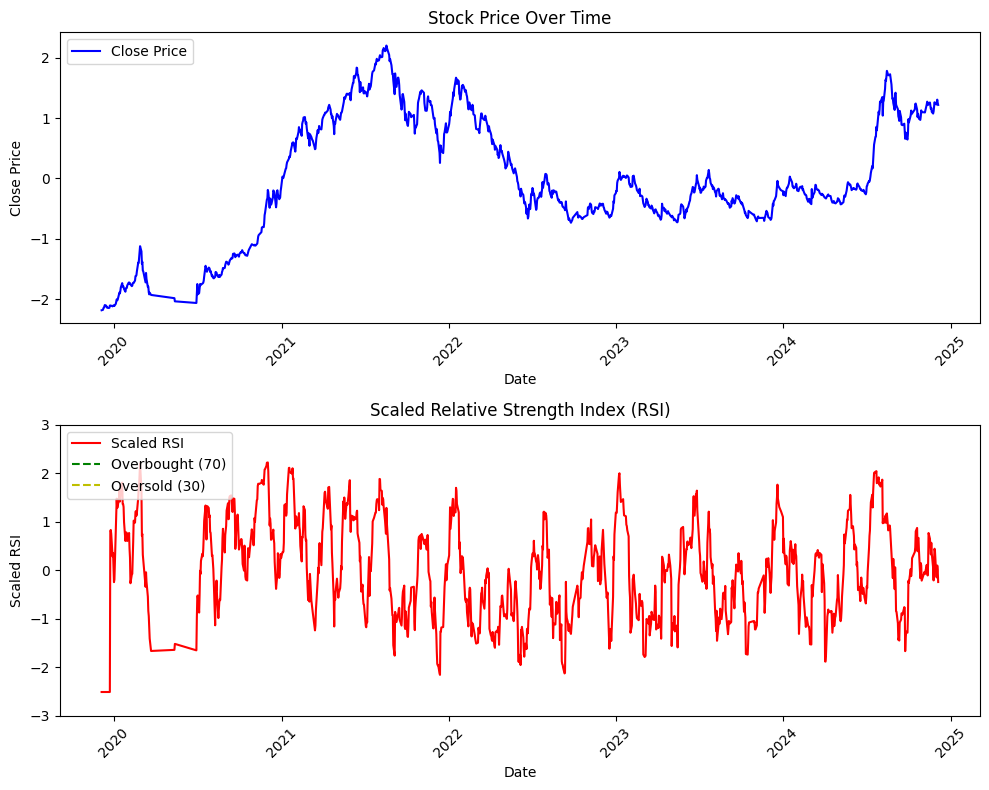

In [100]:
data['Date'] = pd.to_datetime(data['Date'])

# Create the figure and axes for subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot the Close price on the first subplot
ax[0].plot(data['Date'], data['Close'], label='Close Price', color='b')
ax[0].set_title('Stock Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Close Price')
ax[0].legend(loc='upper left')
ax[0].tick_params(axis='x', rotation=45)

# Plot the RSI on the second subplot using the scaled RSI values
ax[1].plot(data['Date'], scaled_df['RSI'], label='Scaled RSI', color='r')
ax[1].axhline(70, color='g', linestyle='--', label='Overbought (70)')
ax[1].axhline(30, color='y', linestyle='--', label='Oversold (30)')
ax[1].set_title('Scaled Relative Strength Index (RSI)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Scaled RSI')
ax[1].legend(loc='upper left')


# for StandardScaler, the values are usually in a range of -2 to 2)
ax[1].set_ylim([-3, 3])  # Adjusted for scaled data

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Layout adjustment to avoid overlapping
plt.tight_layout()

plt.show()







In [101]:
print(data['Volume'].dtype)
print(data.head())

float64
        Date     Close Percent Change    Volume       RSI  delta  Next Close
0 2019-12-05 -2.186536          0.00% -0.947954 -2.505733    NaN     1135.37
1 2019-12-08 -2.179206          0.00% -0.964799 -2.505733   3.45     1148.89
2 2019-12-09 -2.150482          0.00% -0.923060 -2.505733  13.52     1151.36
3 2019-12-10 -2.145234          0.00% -0.914530 -2.505733   2.47     1161.47
4 2019-12-11 -2.123755          0.00% -0.902471 -2.505733  10.11     1172.64


In [102]:




data = data.dropna(subset=['RSI', 'Close', 'Volume'])

data = data.dropna(subset=['Next Close'])

X = data[['RSI', 'Close', 'Volume']]
y = data['Next Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()



model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
data

Mean Absolute Error: 26.27079175605988


,Date,Close,Percent Change,Volume,RSI,delta,Next Close
0,2019-12-05,-2.186536,0.00%,-0.947954,-2.505733,NaN,1135.37
1,2019-12-08,-2.179206,0.00%,-0.964799,-2.505733,3.45,1148.89
2,2019-12-09,-2.150482,0.00%,-0.923060,-2.505733,13.52,1151.36
3,2019-12-10,-2.145234,0.00%,-0.914530,-2.505733,2.47,1161.47
4,2019-12-11,-2.123755,0.00%,-0.902471,-2.505733,10.11,1172.64
...,...,...,...,...,...,...,...
1123,2024-11-28,1.247044,-0.30%,0.985952,0.397159,-7.42,2738.06
1124,2024-12-01,1.225819,-0.36%,1.053678,-0.127183,-9.99,2758.04
1125,2024-12-02,1.268268,0.72%,1.457510,-0.145997,19.98,2775.85
1126,2024-12-03,1.306107,0.64%,0.980210,0.100519,17.81,2750.87


visualizing actual vs predicted


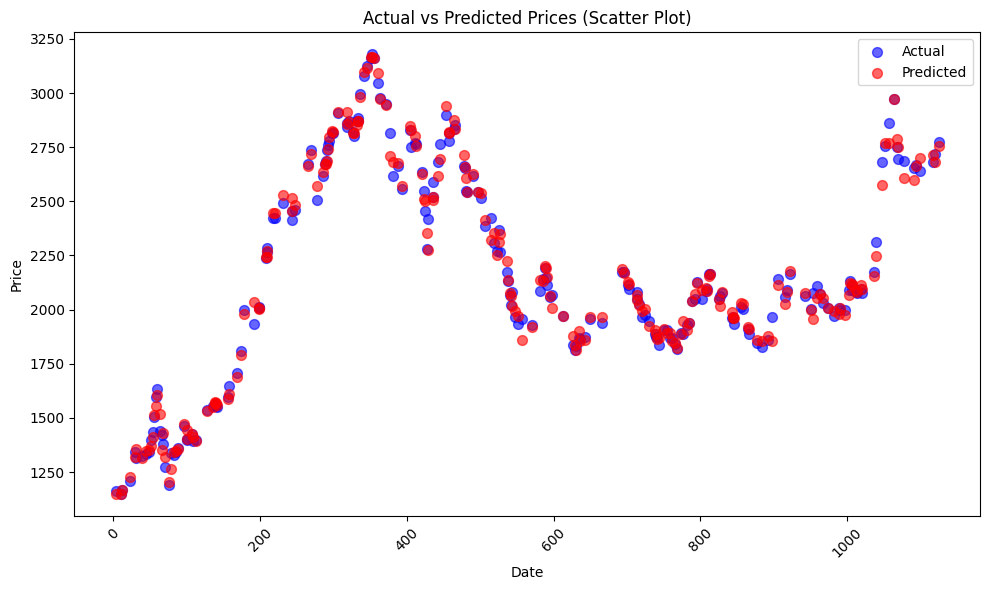

In [103]:



plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
plt.scatter(y_test.index, y_test, label='Actual', color='blue', alpha=0.6, s=50)
plt.scatter(y_test.index, y_pred, label='Predicted', color='red', alpha=0.6, s=50)

# Title and labels
plt.title('Actual vs Predicted Prices (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend and adjust layout
plt.legend()
plt.tight_layout()


plt.show()




checking prediction for tommorrows price 

In [105]:
today_data = pd.DataFrame({
    'RSI': [64.35],
    'Close': [2694.82],
    'Volume': [9744843375.00]
})

# Scale the input features
today_scaled = scaler.transform(today_data)

# Predict using scaled input
predicted_price = model.predict(today_scaled)

print(f"Tomorrow's predicted price: {predicted_price[0]}")


Tomorrow's predicted price: 2696.3608027036335


c:\check\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
